#### An Implementation of Decision Trees/Random Forest for Regression

#### Introduction

In this notebook, I will be covering how to implement a Decision Tree and Random Forest model in sklearn with the House Sales in King County, USA from Kaggle. This is a regression problem which means our aim is to predict a continuous value. We will attempt to predict House Prices based on features of houses recently sold in King County.

![DT](https://metro.kingcounty.gov/sitecore/images/metro-fare-zones.jpg)

#### DataSet

According to Kaggle: This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. This is a good exercise for Simple Regression Problems. The dataset can be found at the below link: 

https://www.kaggle.com/harlfoxem/housesalesprediction/data

The Attributes of the Dataset can be found below: 

* id - a notation for a house - Numeric
* date - Date house was sold - String
* ** price - Price is prediction target - Numeric**
* bedrooms - Number of Bedrooms/House - Numeric
* bathrooms - Number of bathrooms/bedrooms -Numeric
* sqft_living - square footage of the home - Numeric
* sqft_lot - square footage of the lot -Numeric
* floors - Total floors (levels) in house -Numeric
* waterfront - House which has a view to a waterfront - Numeric
* view - Has been viewed - Numeric
* condition - How good the condition is ( Overall ) - Numeric
* grade - overall grade given to the housing unit, based on King County grading system - Numeric
* sqft_above - square footage of house apart from basement - Numeric
* sqft_basement - square footage of the basement - Numeric
* yr_built - Built Year - Numeric
* yr_renovated - Year when house was renovated - Numeric
* zipcode - zip -Numeric
* lat -Latitude coordinate -Numeric
* long - Longitude coordinate -Numeric
* sqft_living15 - Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area - Numeric
* sqft_lot15 - lotSize area in 2015(implies-- some renovations) -Numeric

#### Evaluation Metric
Before beginning we must first decide an Evaluation Metric which we wish to optimize for. In this Machine Learning Problem, we will be using the RMSE measure which tells us the average difference between our predictions and actual y target values. This measure is often used to determine quality of predictions in Regression problems.

$$ \large RMSE = \sqrt{\sum_{n=1}^n\frac{1}{n}(\hat y_{i} - y_{i})^{2}} $$

#### Import packages/Dataset
Lets begin with importing the required packages and import the dataset.

In [1]:
## Basic Data Processing 
import pandas as pd
pd.set_option('max_columns', 35)
pd.set_option('max_rows', 600)
import numpy as np 

## Data Visualization 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
sns.set_style("darkgrid")

## ML Related 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

##Tree Visualization
from sklearn import tree
import graphviz

## Map Plotting 
from mpl_toolkits.basemap import Basemap

In [2]:
kchouse = pd.read_csv('kc_house_data.csv')

#### EDA/Data Cleaning

Now that we have our data in the dataframe kchouse, lets try getting a feel for the data and examining features to see what patterns we can find. We can do this easily with the head and describe functions. 

In [3]:
kchouse.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
kchouse.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


It seems we can drop the features id and date as they really will have no impact on our Machine Learning model. ID is just a unique identifier for the house while date is the day the house was sold. 

In [5]:
kchouse = kchouse.drop(['id','date'], axis=1)

Lets begin looking at individual features and see what patterns or trends we can derive. 

##### I. Bedrooms

It looks like having more rooms steadily increases price of a house until 9 rooms where the price begins to taper off based on the medians.

In [6]:
kchouse_m_bedrooms = kchouse.groupby('bedrooms', as_index=True).median()

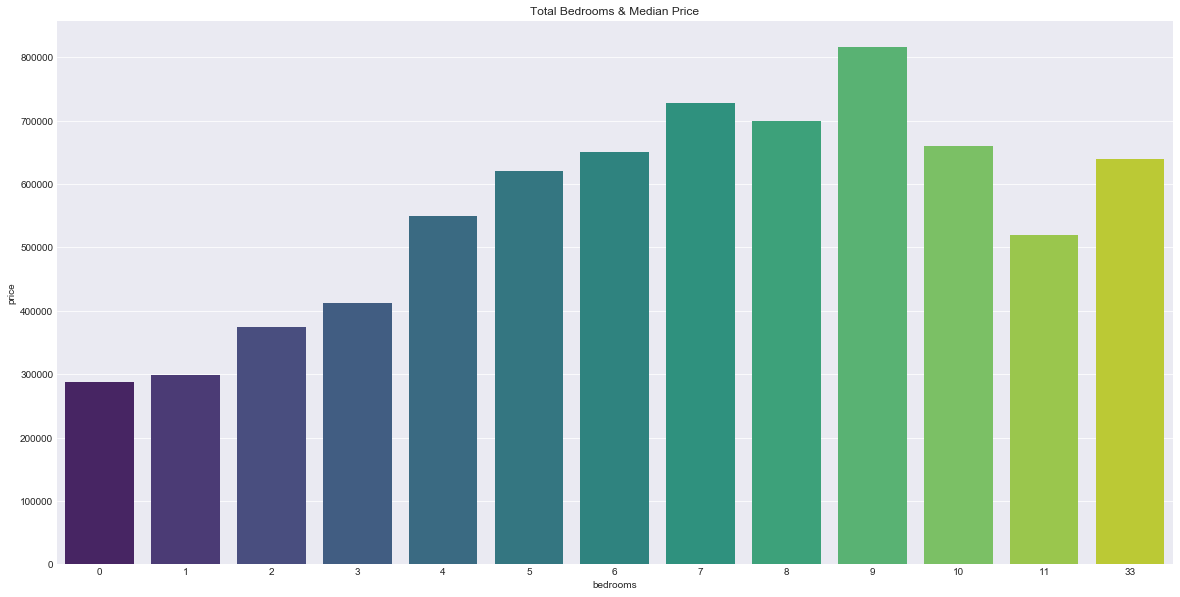

In [7]:
plt.figure(figsize=(20,10))
plt.title('Total Bedrooms & Median Price')
sns.barplot(x=kchouse_m_bedrooms.index,y='price', data=kchouse_m_bedrooms, palette = 'viridis')

##### II. Bathrooms
It looks like total bathrooms steadily increases the price. It is possible that houses with 7.75 and 8.0 bathrooms are outliers as not many houses have this many bathrooms. 

In [8]:
kchouse_m_bathrooms= kchouse.groupby('bathrooms', as_index=True).median()

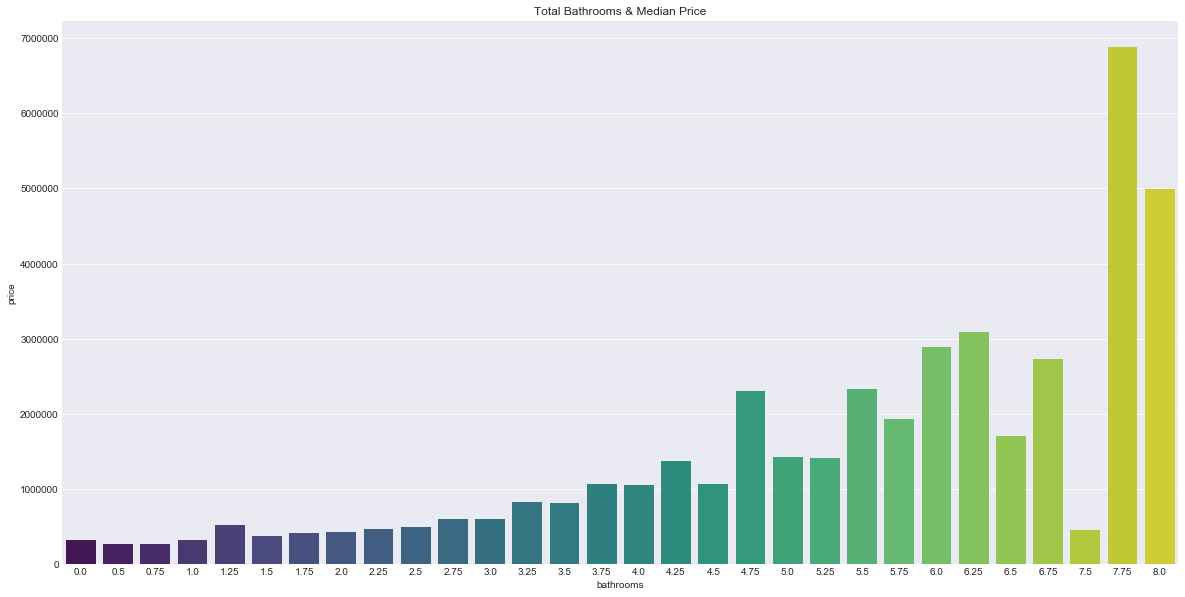

In [9]:
plt.figure(figsize=(20,10))
plt.title('Total Bathrooms & Median Price')
sns.barplot(x=kchouse_m_bathrooms.index,y='price', data=kchouse_m_bathrooms, palette = 'viridis')

As expected there are not many houses with 6 or more bathrooms. 

In [10]:
kchouse[kchouse['bathrooms'] > 6]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4024,800000.0,7,6.75,7480,41664,2.0,0,2,3,11,5080,2400,1953,0,98166,47.4643,-122.368,2810,33190
7252,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
8092,4668000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
8546,450000.0,9,7.50,4050,6504,2.0,0,0,3,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866
9254,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
12777,2280000.0,7,8.00,13540,307752,3.0,0,4,3,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800
14556,2888000.0,5,6.25,8670,64033,2.0,0,4,3,13,6120,2550,1965,2003,98177,47.7295,-122.372,4140,81021
18302,3300000.0,5,6.25,8020,21738,2.0,0,0,3,11,8020,0,2001,0,98006,47.5675,-122.189,4160,18969
20578,1180000.0,6,6.50,6260,10955,2.0,0,0,3,11,4840,1420,2007,0,98075,47.5947,-122.039,2710,12550
21506,2238890.0,5,6.50,7270,130017,2.0,0,0,3,12,6420,850,2010,0,98027,47.5371,-121.982,1800,44890


##### III. SQFT Living 

The feature sqft_living details the square footage of the home. It looks like SQFT of a house has an upward linear relationship/trend with price. 

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'SQFT of House & Median Price')

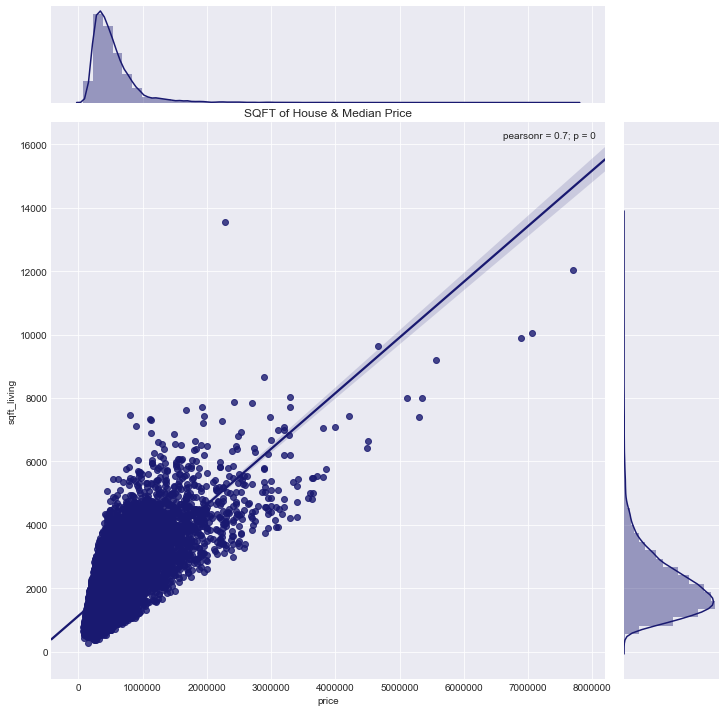

In [11]:
sns.jointplot(x='price',y='sqft_living', data = kchouse, kind = 'reg', size = 10,  color = 'midnightblue')
plt.title('SQFT of House & Median Price')

##### IV. SQFT_Lot

The feature sqft_lot details the square footage of the lot of the home. There does not seem to be much relationship with price as seen in the below graph. 

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'SQFT of Lot & Median Price')

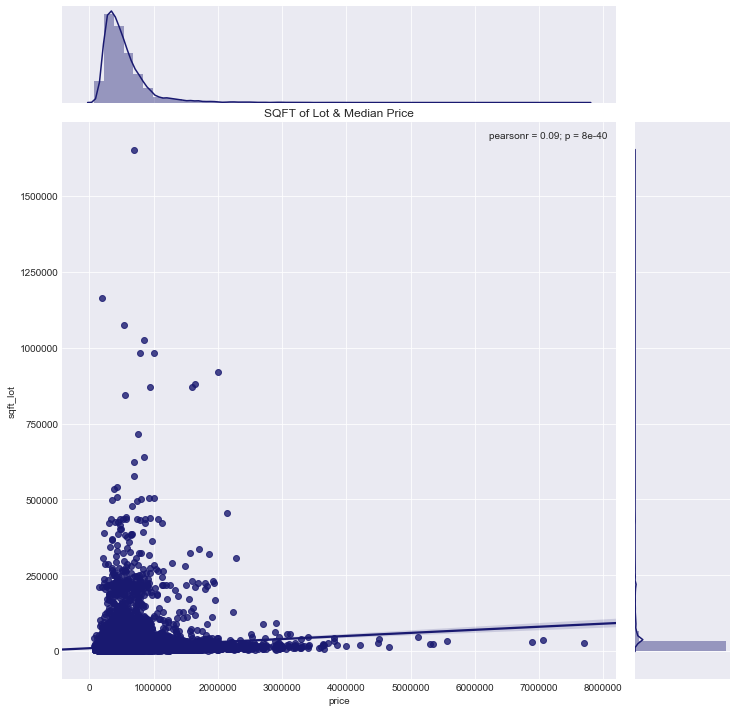

In [12]:
sns.jointplot(x='price',y='sqft_lot', data = kchouse, kind = 'reg', size = 10, color = 'midnightblue')
plt.title('SQFT of Lot & Median Price')

##### V. Floors

Houses with 2.5 floors seem to be higher priced but there does not seem to be much difference among all of the other factors. Perhaps this feature will not be so helpful for our model.

In [13]:
kchouse_m_floors = kchouse.groupby('floors', as_index=True).median()

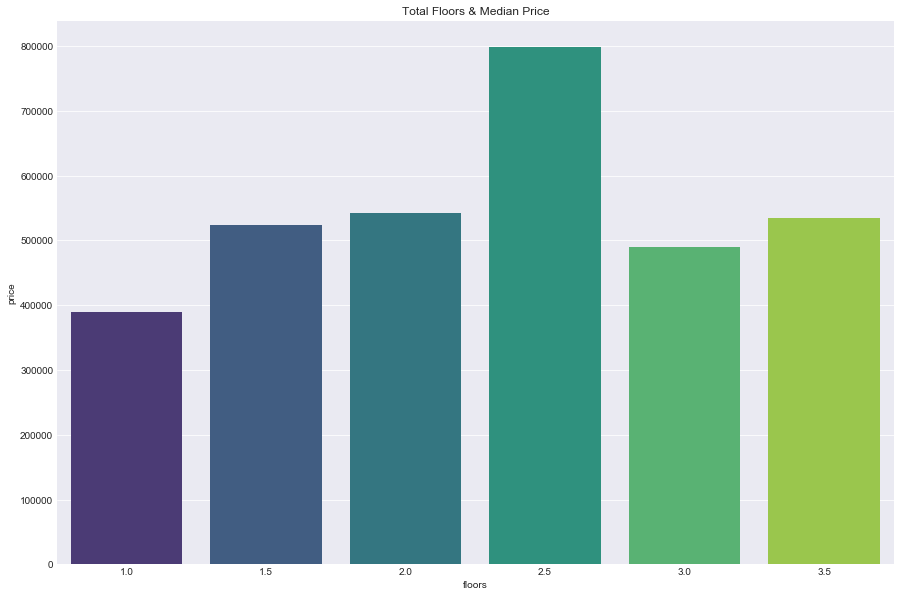

In [14]:
plt.figure(figsize=(15,10))
plt.title('Total Floors & Median Price')
sns.barplot(x=kchouse_m_floors.index,y='price', data=kchouse_m_floors, palette = 'viridis')

##### VI. Waterfront

The next feature is waterfront which is a categorical feature that details whether a home has a view to the waterfront. It clearly looks like houses with waterfront access are of a higher price and may be of great help for our model.

In [15]:
kchouse_m_waterfront = kchouse.groupby('waterfront', as_index=True).median()

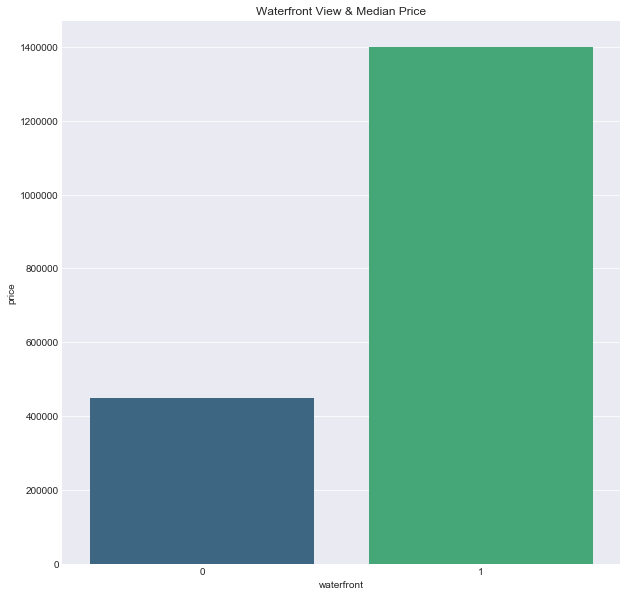

In [16]:
plt.figure(figsize=(10,10))
plt.title('Waterfront View & Median Price')
sns.barplot(x=kchouse_m_waterfront.index,y='price', data=kchouse_m_waterfront, palette= 'viridis')

##### VII. View

The viewed feature tells us how many times a house was viewed. It looks like houses that were viewed more sold for a higher median price. 

In [17]:
kchouse_m_view = kchouse.groupby('view', as_index=True).median()

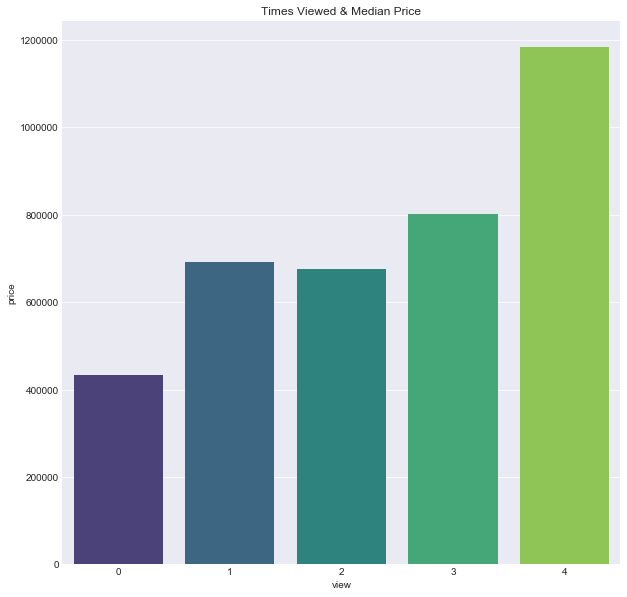

In [18]:
plt.figure(figsize=(10,10))
plt.title('Times Viewed & Median Price')
sns.barplot(x=kchouse_m_view.index,y='price', data=kchouse_m_view, palette= 'viridis')

##### VIII. Condition

Condition is a numeric feature that tells us how good the house is from a condition perspective. It seems that houses with a higher rating definitely go for a higher median price on average. 

In [19]:
kchouse_m_condition = kchouse.groupby('condition', as_index=True).median()

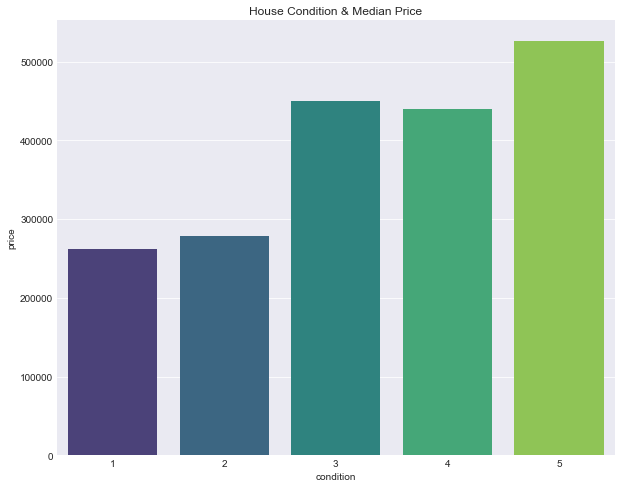

In [20]:
plt.figure(figsize=(10,8))
plt.title('House Condition & Median Price')
sns.barplot(x=kchouse_m_condition.index,y='price', data=kchouse_m_condition, palette= 'viridis')

##### IX. Grade

The grade is a feature that gives us an overall grade of a housing unit based on the King County Grading system. We can clearly see in the below graph that higher grades often lead to higher sold housing prices. 

In [21]:
kchouse_m_grade = kchouse.groupby('grade', as_index=True).median()

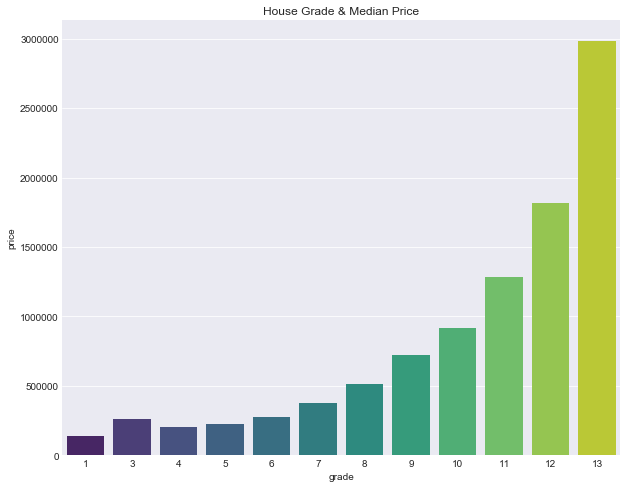

In [22]:
plt.figure(figsize=(10,8))
plt.title('House Grade & Median Price')
sns.barplot(x=kchouse_m_grade.index,y='price', data=kchouse_m_grade, palette= 'viridis')

##### X. SQFT_Above

sqft_above is a feature that tells us how many square feet the property is without the basement. It looks like this feature is highly correlated with price. 

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'SQFT Above Ground & Median Price')

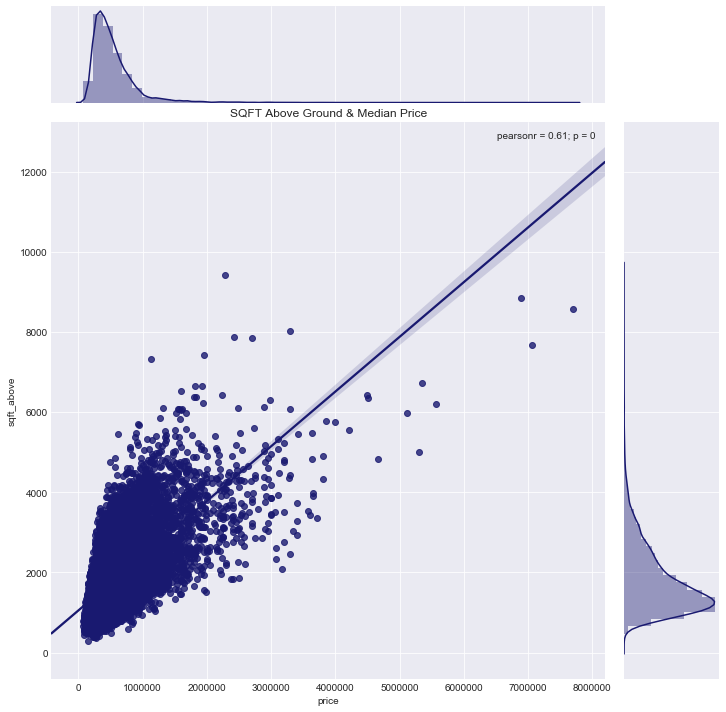

In [23]:
sns.jointplot(x='price',y='sqft_above', data = kchouse, kind = 'reg', size = 10, color = 'midnightblue')
plt.title('SQFT Above Ground & Median Price')

##### XI. SQFT_Basement 

SQFT_Basement is a feature that tells us how many square feet a basement is. As we can see with the graphy there seems to be some relationship between basement size and price but there are also many 0's which probably indicate lack of basement.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'SQFT Basement & Median Price')

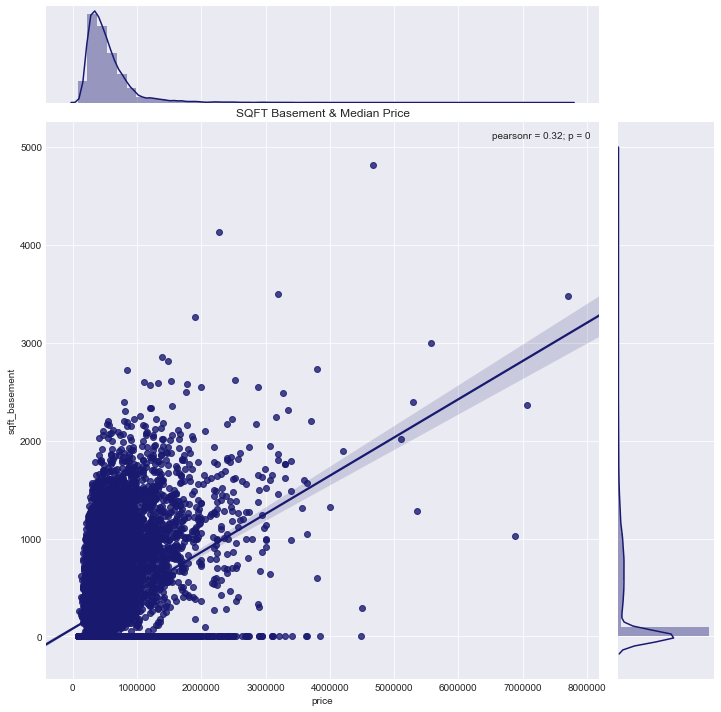

In [24]:
sns.jointplot(x='price',y='sqft_basement', data = kchouse, kind = 'reg', size = 10, color = 'midnightblue')
plt.title('SQFT Basement & Median Price')

##### XII. yr_built

The next feature we will examine is yr_built which is the yr the housing unit was created. After Grouping years and generating median prices there does not seem to be any trend associated with yr_built. Old Houses and New houses all can go for similar prices. 

In [25]:
kchouse_m_yr_built = kchouse.groupby('yr_built', as_index=True).median()

Text(0.5,1,'Year Built & Median Price')

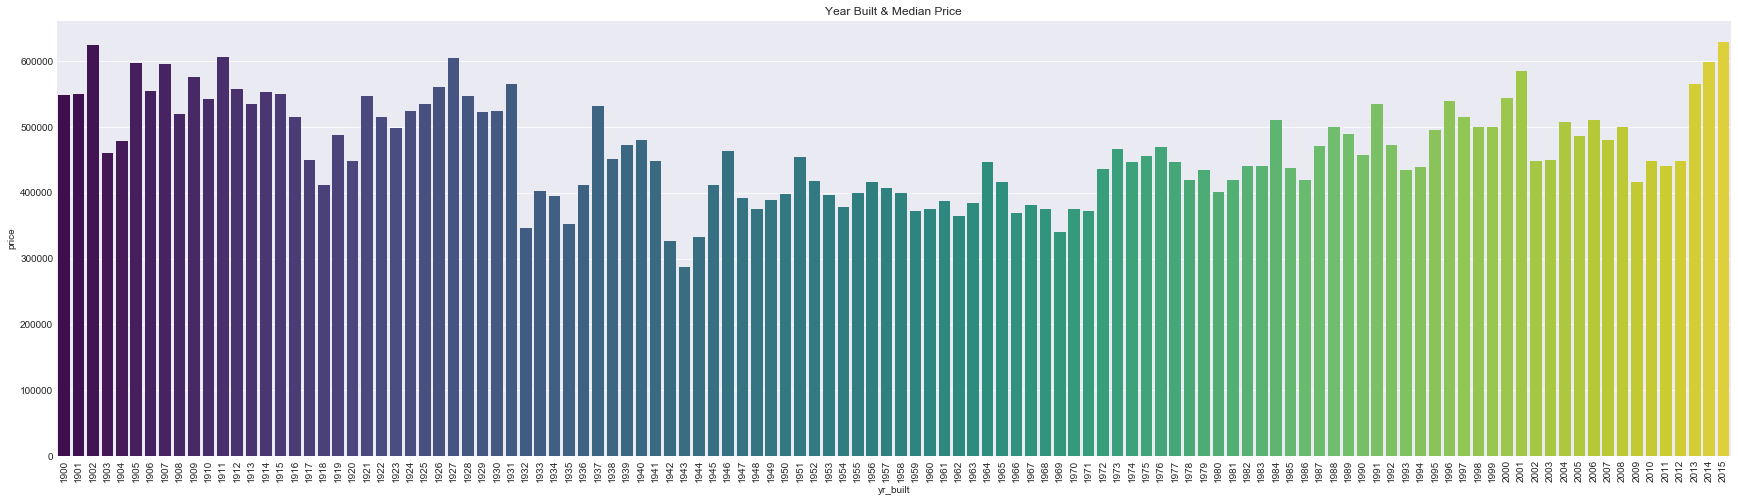

In [26]:
plt.figure(figsize=(30,8))
plt.xticks(rotation=90)
sns.barplot(x=kchouse_m_yr_built.index,y='price', data=kchouse_m_yr_built, palette= 'viridis')
plt.title('Year Built & Median Price')

##### XIII. yr_renovated

The Yr Renovated feature gives us a year the housing unit was renovated. We can see the average price for 0 (No Renovation) and every year below. Newly renovated houses on general seem to be higher priced than the baseline. 

In [27]:
kchouse_m_yr_ren = kchouse.groupby('yr_renovated', as_index=True).median().sort_values(by='price',ascending=False)

Text(0.5,1,'Year Renovated & Median Price')

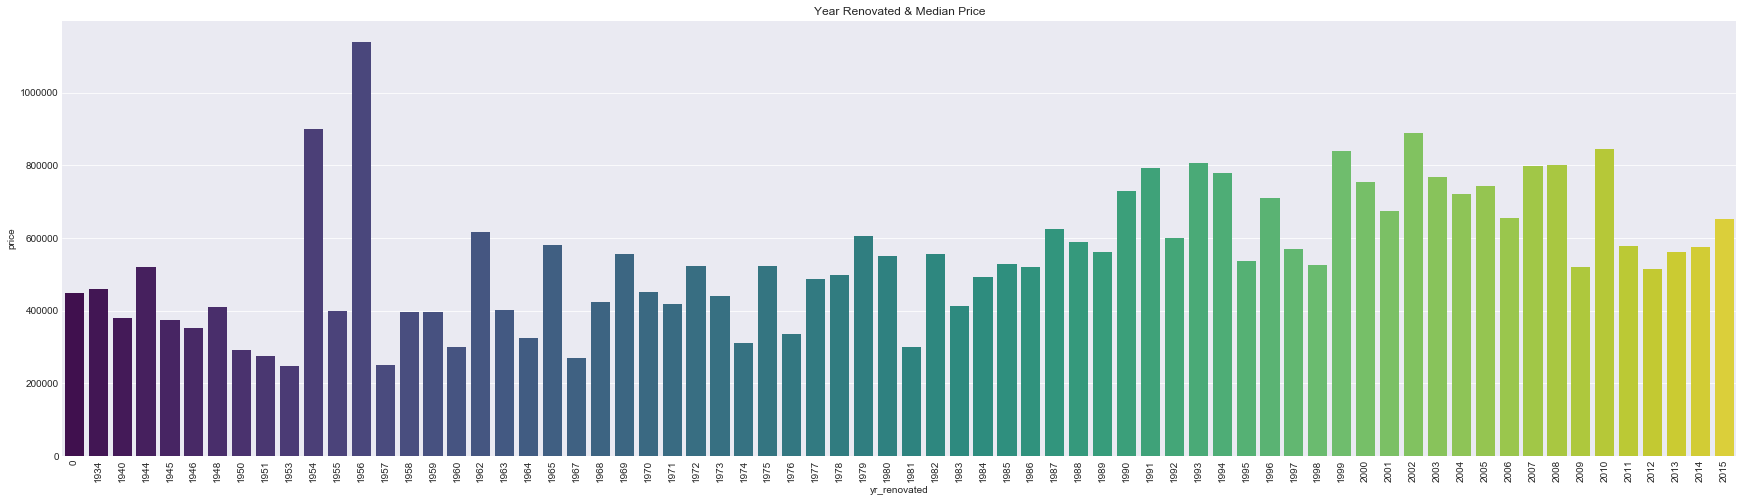

In [28]:
plt.figure(figsize=(30,8))
plt.xticks(rotation=90)
sns.barplot(x=kchouse_m_yr_ren.index,y='price', data=kchouse_m_yr_ren, palette= 'viridis')
plt.title('Year Renovated & Median Price')

#### Visualize Housing

As an extra, incase you are interested in visualizing the dataset on a map. You can install Basemap and visualize all the housing prices with the below code. Pretty cool visualization!

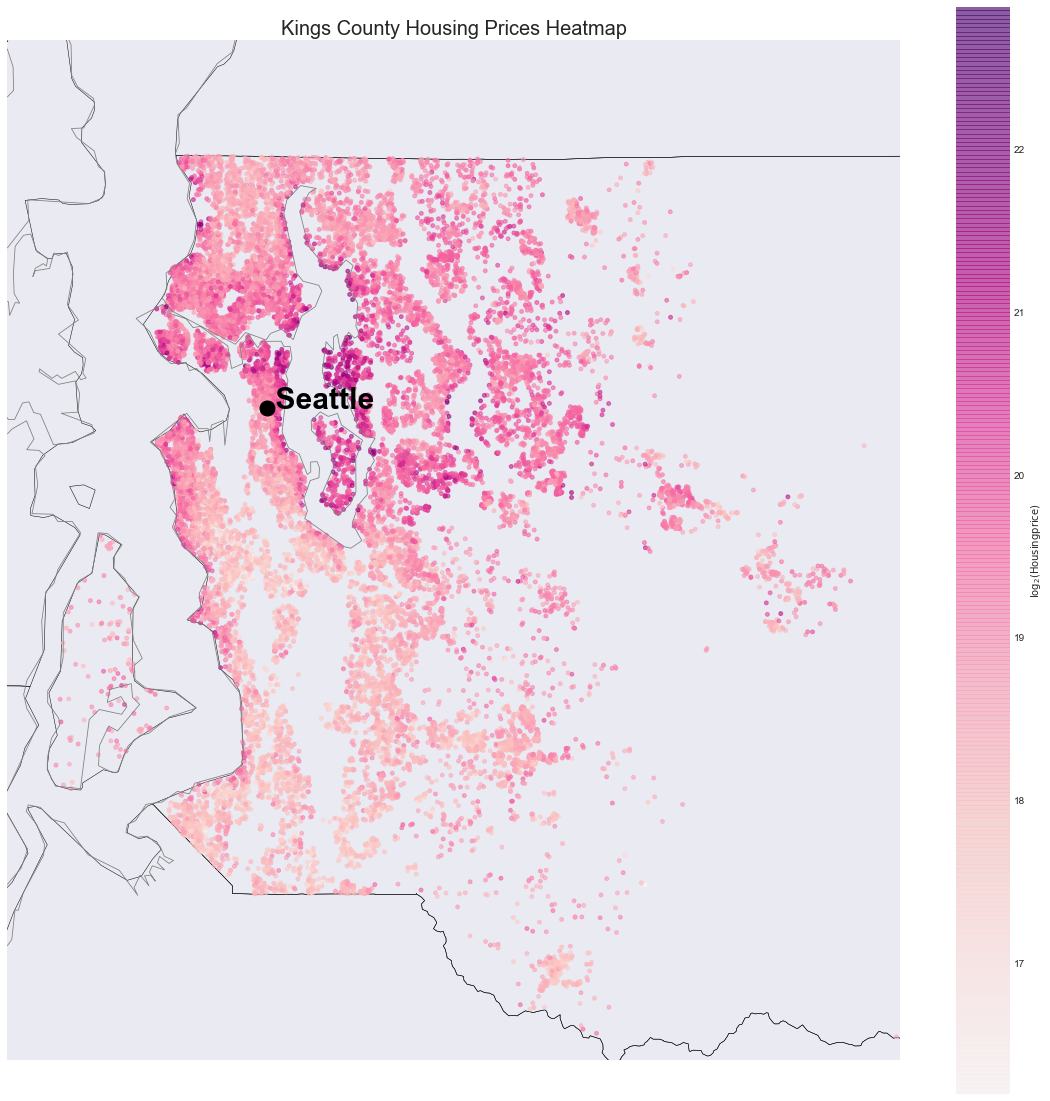

In [29]:
## Organize Values
lat = kchouse['lat'].values
lon = kchouse['long'].values
price = kchouse['price'].values

## Plot Map 
fig = plt.figure(figsize=(20, 20))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=47.5, lon_0=-122.105167,
            width=.7E5, height=.8E5)
m.drawcoastlines(linewidth=.8, color='gray')
m.drawcountries(linewidth = .8,color='gray')
m.drawstates(linewidth = .8,color='gray')
m.drawrivers(linewidth = .8,color='gray')
m.drawcounties(linewidth = .5, color='black')

## Plot Seattle Location
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=15)
plt.text(x, y, ' Seattle', fontsize=30, color='black', weight='heavy')

## Plot Scatter of Lons/Lats
m.scatter(lon, lat, latlon=True,
          c=np.log2(price), 
          cmap='RdPu', alpha = .6, s=15)

# Create colorbar, legend, title
plt.colorbar(label=r'$\log_{2}({\rm Housing price})$')
plt.title('Kings County Housing Prices Heatmap',fontsize=20)
plt.show()

#### Feature Engineering

Feature Engineering is your chance to be creative in the Machine Learning process. It is the process of deriving or creating features from data to better help your model generalize on the data. 

Here are some ideas I have for Feature Engineering based on my above data analysis:  
* yr_renovated - Turn to Flag 1 if renovated 0 if not or bucket based on year ranges
* sqft_living15 - Year 15 Living room SQFT maybe subtract sqft_living from sqft_living15 to create (additional space added since 2015)
* sqft_lot15 - year 15 lotsize - maybe subtract from sqft_lot to return additional lot space since 2015.


##### I. Feature Engineered 1 - Renovated Flag

My first feature engineered is something that I call the renovated flag. It returns a 1 if a house was renovated and 0 if not.  It looks like from a median perspective renovated houses go for a higher price than non-renovated housing units. 

In [30]:
kchouse['renovatedflag'] = np.where(kchouse['yr_renovated'] == 0 , 0, 1)

In [31]:
kchouse.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovatedflag
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0


Text(0.5,1,'Renovated vs Median Price')

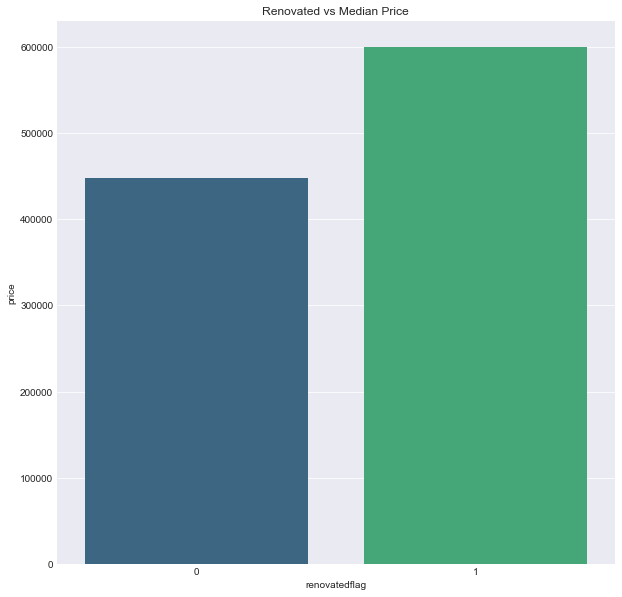

In [32]:
ren_flag = kchouse.groupby('renovatedflag', as_index=True).median()
plt.figure(figsize=(10,10))
sns.barplot(x=ren_flag.index,y='price', data=ren_flag, palette= 'viridis')
plt.title('Renovated vs Median Price')

Lets drop yr_renovated now as we have created a new feature in place of this. 

In [33]:
kchouse = kchouse.drop('yr_renovated',axis=1)

##### II. Feature Engineered 2 - Sqft Living Change Since 2015 

The next feature to be engineered is called Sqft_living_Chg which details how much housing square footage has changed from 2015 to the present. sqft_living15 details how much sqfootage was available in 2015 and if we subtract it from the sqft_living variable we can get a difference between both time periods. I hypothesize that any house with significant change since 2015 will probably have higher prices. 

In [34]:
kchouse['Sqft_living_Chg'] = kchouse['sqft_living'] - kchouse['sqft_living15']

In [35]:
kchouse.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovatedflag,Sqft_living_Chg
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,0,-160
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,1,880
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062,0,-1950
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000,0,600
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503,0,-120


Based on my graph it looks like my new feature does have some correlation to the median price. 

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Sqft Change since 2015 & Price')

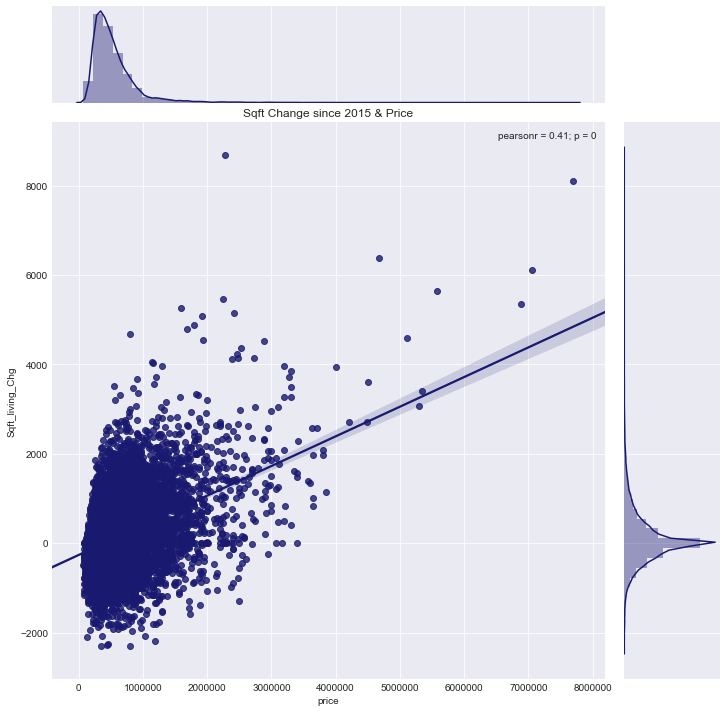

In [36]:
sns.jointplot(x='price',y='Sqft_living_Chg', data = kchouse, kind = 'reg', size = 10, color = 'midnightblue')
plt.title('Sqft Change since 2015 & Price')

##### III. Feature Engineered 3 - Sqft Lot Change Since 2015

The last feature I will create is Sqft_lot_Chg which details how much lot space has changed since 2015. I also hypothesize that any significant change will have a direct impact on price. 

In [37]:
kchouse['Sqft_lot_Chg'] = kchouse['sqft_lot'] - kchouse['sqft_lot15']

After visualizing the new feature it seems that it does not really have much impact on price after all. It was worth a try though and feature engineering is often experimental!

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'SQft Lot Change vs Price')

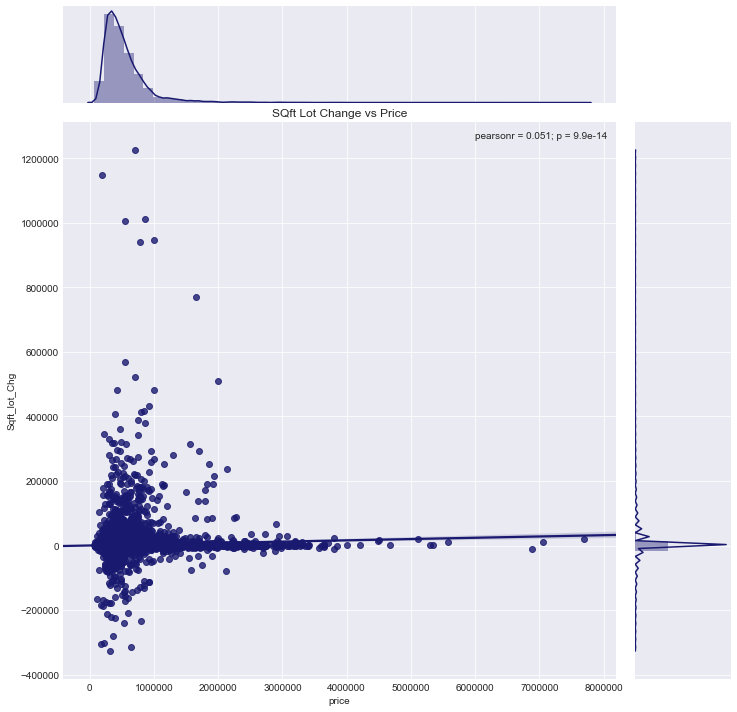

In [38]:
sns.jointplot(x='price',y='Sqft_lot_Chg', data = kchouse, kind = 'reg', size = 10, color = 'midnightblue')
plt.title('SQft Lot Change vs Price')

We can also drop the features sqft_living15 and sqft_lot15 as we have replaced them with our new features. 

In [39]:
kchouse = kchouse.drop(['sqft_living15','sqft_lot15'],axis=1)

Lets look at our final dataset before we move on and create our training and test sets. Looks great. 

In [40]:
kchouse.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,renovatedflag,Sqft_living_Chg,Sqft_lot_Chg
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,47.5112,-122.257,0,-160,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125,47.7210,-122.319,1,880,-397
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028,47.7379,-122.233,0,-1950,1938
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,98136,47.5208,-122.393,0,600,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074,47.6168,-122.045,0,-120,577


That was a good small exercise in Feature Engineering. 

#### Split Test / Train Set 

Lets now transform our final dataset into a train and test set. The train set will be used to train the model and the test set will be used to evaluate the model on unseen data. We will also need to separate the x(features) from the y (target) values before beginning our training. This process can be seen in the below code. 

In [41]:
train_set, test_set = train_test_split(kchouse, test_size = 0.2, random_state = 42)

In [42]:
X_train = train_set.drop('price',axis=1)
y_train = train_set['price'].copy()

X_test = test_set.drop('price',axis=1)
y_test = test_set['price'].copy()

#### Variable Importance with Random Forest 

Now that our data is in the proper format lets use the Random Forest feature_importances_ to give us a list of the most important features. This is one of many useful techniques that can be used for feature selection. 

In [43]:
RFclf = RandomForestRegressor(n_estimators=100, criterion='mse')

In [44]:
RFclf = RFclf.fit(X_train,y_train)

In [45]:
features = X_train.columns
importances = RFclf.feature_importances_

print("Features sorted by most importance:")
print(sorted(zip(map(lambda x: round(x, 2), RFclf.feature_importances_), features), 
             reverse=True))

Features sorted by most importance:
[(0.34, 'grade'), (0.25, 'sqft_living'), (0.15, 'lat'), (0.06, 'long'), (0.03, 'yr_built'), (0.03, 'waterfront'), (0.02, 'zipcode'), (0.02, 'sqft_lot'), (0.02, 'sqft_above'), (0.02, 'Sqft_living_Chg'), (0.01, 'view'), (0.01, 'sqft_basement'), (0.01, 'bathrooms'), (0.01, 'Sqft_lot_Chg'), (0.0, 'renovatedflag'), (0.0, 'floors'), (0.0, 'condition'), (0.0, 'bedrooms')]


It looks like our Random Forest Classifier has determined grade, sqft_living, lat, long, yr_built, and waterfront properties to be the most important features. Lets keep these features and build a simple decision tree. 

In [46]:
## Quick Model with just dropping of abitrary features 
X_train = X_train[['grade','sqft_living','lat','long','yr_built','waterfront']]
X_test = X_test[['grade','sqft_living','lat','long','yr_built','waterfront']]

#### Decision Tree Regressor

Lets build a simple Decision tree with a max_depth of 3. The max depth determines how deep a tree goes. We are doing this to simply illustrate the logic our decision tree is using to predict values however many trees can have huge depths depending on situation. 

Lets Fit the classifier with the fit() function and predict values with the predict() function for the training set. 

In [47]:
clf = DecisionTreeRegressor(max_depth=3)

In [48]:
clf = clf.fit(X_train,y_train)

In [49]:
y_pred = clf.predict(X_train)

#### Training Set Evaluation

Now we will begin evaluation of our simple Decision Tree Model. If you remember from the beginning of this notebook. 

The metric we are using to evaluate this model is the RMSE notated by: 
$$ \large RMSE = \sqrt{\sum_{n=1}^n\frac{1}{n}(\hat y_{i} - y_{i})^{2}} $$

The goal of this metric is to get it as low as possible as lower indicates overall predictions that are closer to the actual values.In our current Decision Tree model it seems our average prediction is around $ 225,308 off from the actual value. 

In [50]:
np.sqrt(mean_squared_error(y_train, y_pred))

225308.37182878164

We can also visualize this with the below graph. The blue line & circles detail the actual values while the red line & crosses detail the predicted values. The closer the red line is to the blue line the better our model is fitting the data. 

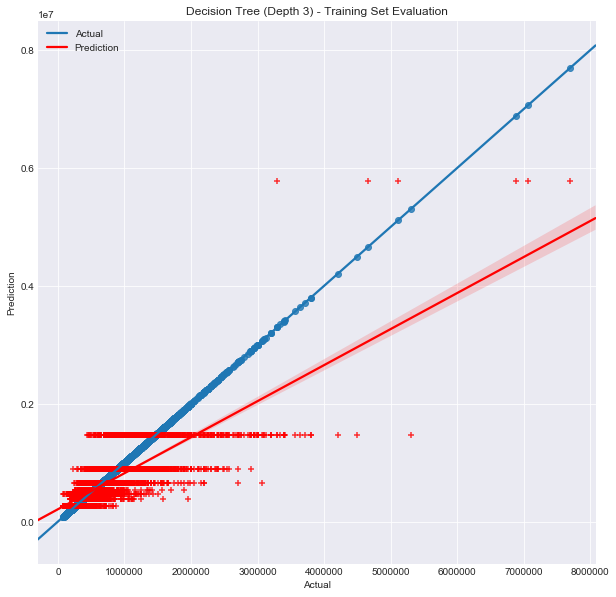

In [51]:
# Visualize Prediction vs Actual
DF = pd.DataFrame({'Actual':y_train, 'Prediction': y_pred})
#Plot Actual values
plt.figure(figsize=(10,10))
sns.regplot(x=DF['Actual'], y=DF['Actual'])
#Plot Predicted values
sns.regplot(x=DF['Actual'], y=DF['Prediction'], marker="+", color='Red')
#Legend and show
plt.title('Decision Tree (Depth 3) - Training Set Evaluation')
plt.legend(['Actual','Prediction'])
plt.show()

#### Test Set Evaluation

Lets now try evaluating this decision tree model on the test or hold out set. We can see how well our model performs on unseen data which is the goal of Machine Learning.

Lets use the predict function again to predict values based on the test set.

In [52]:
y_pred_test = clf.predict(X_test)

When evaluating for the RMSE we can see that the value is slightly higher than the training set. It is usually the case in Machine Learning that the training set performs better than the Test Set. Our RMSE with this decision tree model indicates a difference of $ 257,117 on average from prediction to actual values. This is pretty good considering it is a relatively simple model. 

In [53]:
np.sqrt(mean_squared_error(y_test, y_pred_test))

257117.9540962996

Lets visualize the test set below. 

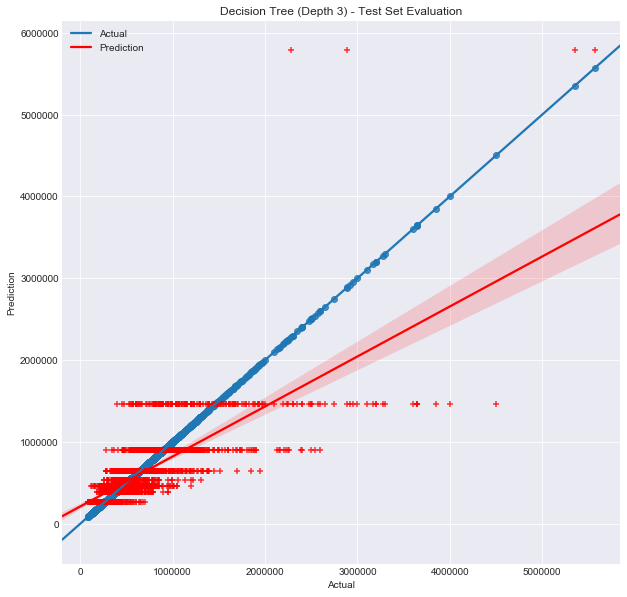

In [54]:
# Visualize Prediction vs Actual
DFtest = pd.DataFrame({'Actual':y_test, 'Prediction': y_pred_test})
#Plot Actual values
plt.figure(figsize=(10,10))
sns.regplot(x=DFtest['Actual'], y=DFtest['Actual'])
#Plot Predicted values
sns.regplot(x=DFtest['Actual'], y=DFtest['Prediction'], marker="+", color='Red')
#Legend and show
plt.title('Decision Tree (Depth 3) - Test Set Evaluation')
plt.legend(['Actual','Prediction'])
plt.show()

#### Decision Tree Visualization

Since our Decision tree only has a depth of 3 we can easily visualize all of the logic that is being used to make decisions in this model. For example, we can see that the first split criteria is whether grade is less or equal to 8.5 Each decision will eventually lead to a terminal node where an predicted value will be returned. The below code creates this through the use of the graphviz package. Decision trees are good as they offer some interpretability of the model. 

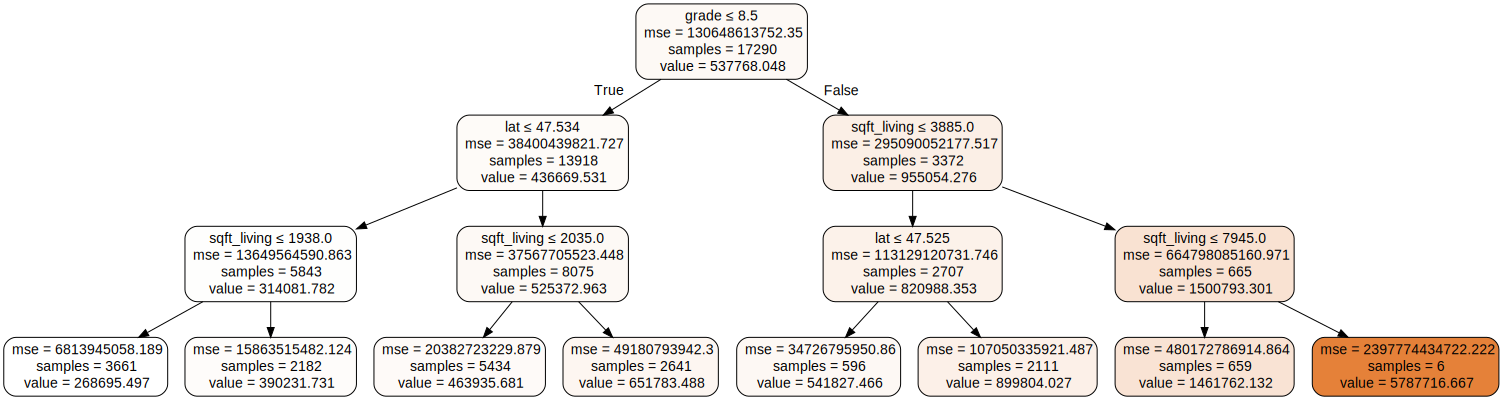

In [55]:
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=X_train.columns,
                         class_names=X_train,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data) 
graph

#### Random Forest 

Building a decision tree was fun but lets see if we can build a stronger predicter. The random forest model utilizes many decision trees to build an even stronger classifier. Lets see if we can get good results with a Random Forest of 100 decision trees. Lets create a RFclf variable and fit it to the training data. Lets then predict what values we get based on the training set. 

In [56]:
RFclf = RandomForestRegressor(n_estimators=100)

In [57]:
RFclf = RFclf.fit(X_train, y_train)

In [58]:
RF_y_pred = RFclf.predict(X_train)

#### Training Set Evaluation

Our training set returned a RMSE of $ 49,178 which is way better than our previous Decision Tree Model. We can also see below that the Red and Blue Lines are much closer than previously indicating a better fit to the data. 

In [59]:
np.sqrt(mean_squared_error(y_train, RF_y_pred))

49178.80617339379

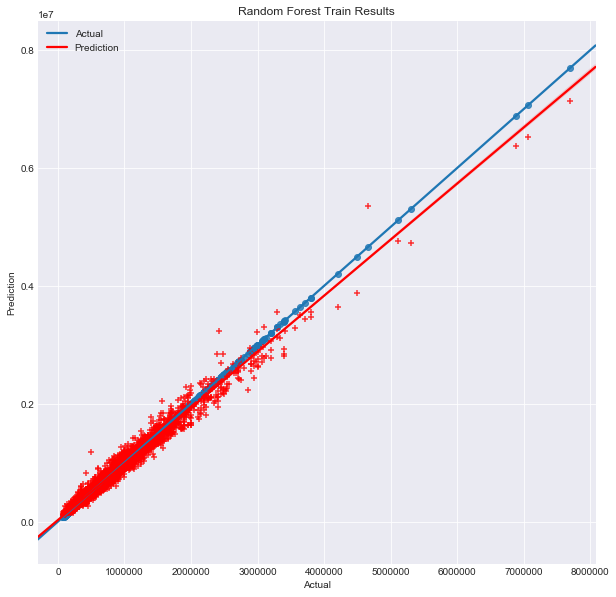

In [60]:
# Visualize Prediction vs Actual
DFRF = pd.DataFrame({'Actual':y_train, 'Prediction': RF_y_pred})
#Plot Actual values
plt.figure(figsize=(10,10))
sns.regplot(x=DFRF['Actual'], y=DFRF['Actual'])
#Plot Predicted values
sns.regplot(x=DFRF['Actual'], y=DFRF['Prediction'], marker="+", color='Red')
#Legend and show
plt.title('Random Forest Train Results')
plt.legend(['Actual','Prediction'])
plt.show()

#### Hyperparameter Tuning 
Lets see if we can improve the model via Hyperparameter Tuning and Random Search. 

In [61]:
random_grid = {'n_estimators': [500],
              'bootstrap': [True],
              'max_depth': [2,3,None],
              'max_features': ['auto'],
              'min_samples_leaf': [1, 2,10,30,50],
              'min_samples_split': [2,3,10],
              'max_features': ['auto','sqrt','log2'],}
random = RandomizedSearchCV(estimator = RFclf, param_distributions= random_grid, n_iter = 50, cv = 5, random_state=42, n_jobs = -1,verbose=1)

In [62]:
random.fit(X_train,y_train)
random.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.9min finished


{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [63]:
optimised_RF = random.best_estimator_
optimised_RF

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [64]:
Opt_RF_y_pred = optimised_RF.predict(X_train)

The optimised model returned a mean squared error of 1000 less compared to the previous model. 

In [65]:
np.sqrt(mean_squared_error(y_train, Opt_RF_y_pred))

48592.176858803905

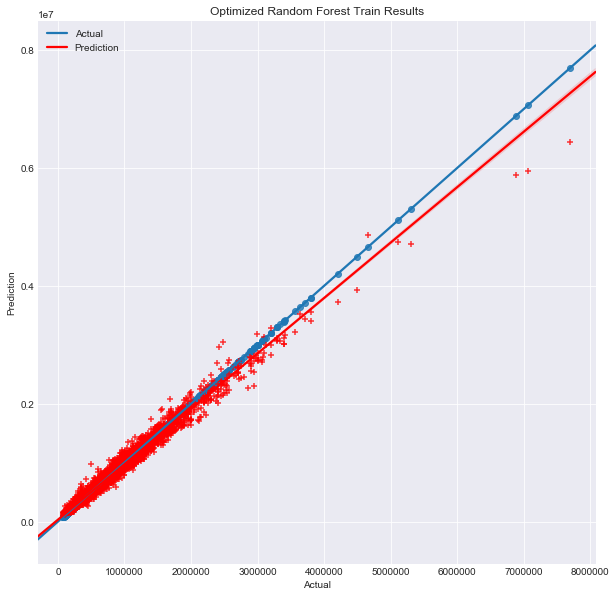

In [66]:
# Visualize Prediction vs Actual
DFRF = pd.DataFrame({'Actual':y_train, 'Prediction': Opt_RF_y_pred})
#Plot Actual values
plt.figure(figsize=(10,10))
sns.regplot(x=DFRF['Actual'], y=DFRF['Actual'])
#Plot Predicted values
sns.regplot(x=DFRF['Actual'], y=DFRF['Prediction'], marker="+", color='Red')
#Legend and show
plt.title('Optimized Random Forest Train Results')
plt.legend(['Actual','Prediction'])
plt.show()

#### Test Set Evaluation 

Its the moment we have all been waiting for. Lets see how our Random Forest Regressor performs on unseen Test data after predicting based on the test set. It looks like we returned an RMSE of $ 130,764. 

This value is much closer than the previous Decision Tree model by a factor of around $ 100,000. This relatively simple Random Forest model was able to get us pretty close housing value predictions. 

In [67]:
RF_y_pred_test = optimised_RF.predict(X_test)

In [68]:
np.sqrt(mean_squared_error(y_test,RF_y_pred_test))

130764.7343100611

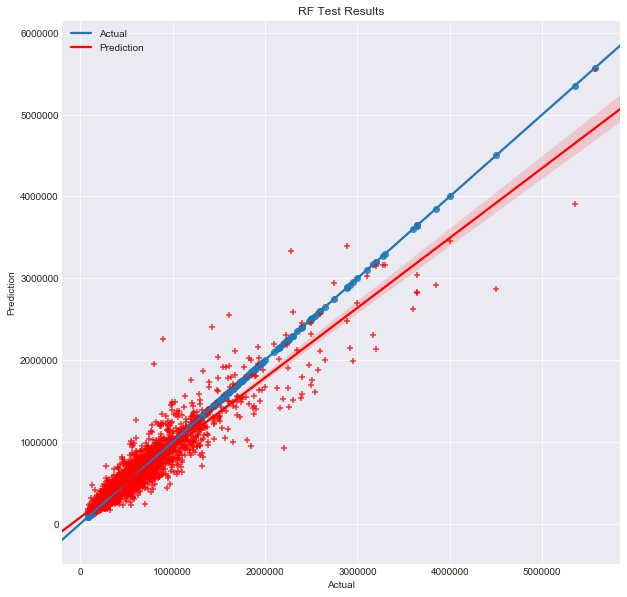

In [69]:
# Visualize Prediction vs Actual
DFRFtest = pd.DataFrame({'Actual':y_test, 'Prediction': RF_y_pred_test})
#Plot Actual values
plt.figure(figsize=(10,10))
sns.regplot(x=DFRFtest['Actual'], y=DFRFtest['Actual'])
#Plot Predicted values
sns.regplot(x=DFRFtest['Actual'], y=DFRFtest['Prediction'], marker="+", color='Red')
#Legend and show
plt.title('RF Test Results')
plt.legend(['Actual','Prediction'])
plt.show()

#### Predictions vs Actual DF

The DFRFtest dataframe has all of the actual vs prediction values if you are interested in taking a look at the results. Just looking at the first 5 results makes me think that most predictions are pretty accurate though. 

In [70]:
round(DFRFtest,2).head()

,Actual,Prediction
735,365000.0,368581.01
2830,865000.0,771263.10
4106,1038000.0,1176137.90
16218,1490000.0,2038932.40
19964,711000.0,707090.94


#### Conclusion
In this notebook, we utilized the Kings Housing Data set to perform Exploratory Data Analysis, Feature Engineering, and train Decision Tree and Random Forest Models to predict housing prices. Machine Learning can be applied to many industries whether it is Housing Prediction, Cancer Detection, or Fraud Detection and Decision Trees/Random Forests are just tools in a ML engineers toolbox. 